<a href="https://colab.research.google.com/github/thap/machine-learning-finance/blob/master/notebooks/Machine_Learning_for_Finance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning for Finance

## Mount Data from Drive

In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
import os
os.chdir('/content/drive/My Drive/data/machine_learning_finance/')
print(os.listdir())

['AAPL.csv', 'AMD.csv', 'QQQ.csv', 'SPY.csv', 'LNG.csv', 'SMLV.csv', 'ta-lib-0.4.0-src.tar.gz']


In [0]:
!cp ta-lib-0.4.0-src.tar.gz /content/

In [0]:
os.chdir('/content')

In [5]:
!ls

drive  sample_data  ta-lib-0.4.0-src.tar.gz


In [0]:
!tar xvzf ta-lib-0.4.0-src.tar.gz

In [7]:
!ls

drive  sample_data  ta-lib  ta-lib-0.4.0-src.tar.gz


In [0]:
os.chdir('ta-lib')

In [0]:
!./configure --prefix=/usr

In [0]:
!make

In [0]:
!make install

In [12]:
os.chdir('..')
!ls

drive  sample_data  ta-lib  ta-lib-0.4.0-src.tar.gz


In [0]:
!pip install TA-Lib

In [14]:
os.chdir('/content/drive/My Drive/data/machine_learning_finance/')
print(os.listdir())

['AAPL.csv', 'AMD.csv', 'QQQ.csv', 'SPY.csv', 'LNG.csv', 'SMLV.csv', 'ta-lib-0.4.0-src.tar.gz']


## Import Data

In [0]:
import pandas as pd

In [0]:
lng = pd.read_csv('LNG.csv', index_col='Date', parse_dates=True)

In [82]:
lng = lng['2016-04-15':'2018-04-10']
lng.shape

(500, 2)

In [83]:
lng.head()

,Adj_Close,Adj_Volume
Date,,
2016-04-15,37.13,4293775.0
2016-04-18,36.90,3445852.0
2016-04-19,37.12,3748050.0
2016-04-20,37.77,2470384.0
2016-04-21,37.21,2043988.0


In [0]:
spy = pd.read_csv('SPY.csv', index_col='Date', parse_dates=True)

In [85]:
spy = spy['2016-04-15':'2018-04-10']
spy.shape

(500, 2)

In [86]:
spy.head()

,Adj_Close,Adj_Volume
Date,,
2016-04-15,199.760673,75761600.0
2016-04-18,201.164330,75277700.0
2016-04-19,201.798846,88316100.0
2016-04-20,201.991139,81100300.0
2016-04-21,200.904747,85695000.0


## EDA

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

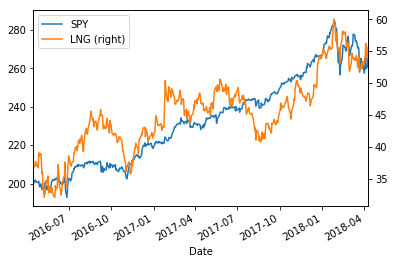

In [88]:
plt.figure()
spy['Adj_Close'].plot(label='SPY', legend=True)
lng['Adj_Close'].plot(label='LNG', legend=True, secondary_y=True)
plt.show()

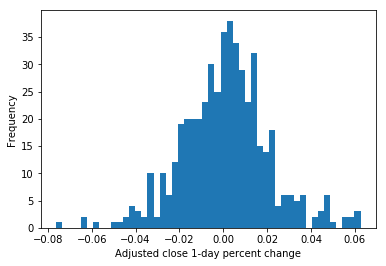

In [89]:
plt.figure()
lng['Adj_Close'].pct_change().plot.hist(bins=50)
plt.xlabel('Adjusted close 1-day percent change')
plt.show()

## Correlations

In [0]:
lng['5d_future_close'] = lng['Adj_Close'].shift(-5)
lng['5d_close_future_pct'] = lng['5d_future_close'].pct_change(5)
lng['5d_close_pct'] = lng['Adj_Close'].pct_change(5)

In [91]:
corr = lng[['5d_close_pct', '5d_close_future_pct']].corr()
print(corr)

                     5d_close_pct  5d_close_future_pct
5d_close_pct             1.000000            -0.164861
5d_close_future_pct     -0.164861             1.000000


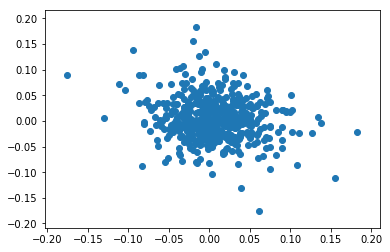

In [92]:
plt.scatter('5d_close_pct', '5d_close_future_pct', data=lng)
plt.show()

## Moving Average and RSI Features

In [0]:
import talib

In [94]:
feature_names = ['5d_close_pct']
for n in [14, 30, 50, 200]:
  lng['ma' + str(n)] = talib.SMA(lng['Adj_Close'].values, 
                                 timeperiod=n) / lng['Adj_Close']
  lng['rsi' + str(n)] = talib.RSI(lng['Adj_Close'].values, timeperiod=n)
  feature_names = feature_names + ['ma' + str(n), 'rsi' + str(n)]
print(feature_names)

['5d_close_pct', 'ma14', 'rsi14', 'ma30', 'rsi30', 'ma50', 'rsi50', 'ma200', 'rsi200']


In [95]:
lng.head(10)

,Adj_Close,Adj_Volume,5d_future_close,5d_close_future_pct,5d_close_pct,ma14,rsi14,ma30,rsi30,ma50,rsi50,ma200,rsi200
Date,,,,,,,,,,,,,
2016-04-15,37.13,4293775.0,37.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-04-18,36.90,3445852.0,36.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-04-19,37.12,3748050.0,37.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-04-20,37.77,2470384.0,39.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-04-21,37.21,2043988.0,38.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-04-22,37.40,2786757.0,38.88,0.039572,0.007272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-04-25,36.75,1830397.0,38.99,0.060952,-0.004065,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-04-26,37.25,2384800.0,37.37,0.003221,0.003502,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-04-27,39.11,2559759.0,35.85,-0.083355,0.035478,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [96]:
lng.tail(10)

,Adj_Close,Adj_Volume,5d_future_close,5d_close_future_pct,5d_close_pct,ma14,rsi14,ma30,rsi30,ma50,rsi50,ma200,rsi200
Date,,,,,,,,,,,,,
2018-03-27,53.06,1907271.0,54.30,0.023370,0.001510,1.004725,46.112898,1.026354,48.423080,1.041368,50.601497,0.922859,52.446487
2018-03-28,52.30,1272452.0,56.21,0.074761,-0.033986,1.017058,42.796606,1.038018,46.788195,1.055159,49.525314,0.936544,52.142361
2018-03-29,53.45,2756953.0,54.36,0.017025,0.027489,0.994387,48.797185,1.012735,49.459257,1.031622,51.130119,0.916875,52.560707
2018-04-02,52.99,2298339.0,54.10,0.020947,0.018843,1.002157,46.687504,1.018431,48.452838,1.039702,50.475091,0.925404,52.376647
2018-04-03,53.98,2230559.0,55.63,0.030567,0.028190,0.983883,51.543070,0.997493,50.686893,1.020085,51.830305,0.909116,52.734657
2018-04-04,54.30,1816771.0,NaN,0.024494,0.023370,0.978927,53.032126,0.989325,51.391328,1.013672,52.261174,0.904405,52.849803
2018-04-05,56.21,2533635.0,NaN,-0.010318,0.074761,0.948929,60.779231,0.955399,55.331261,0.978890,54.727566,0.874433,53.528929
2018-04-06,54.36,1754446.0,NaN,0.023363,0.017025,0.981276,51.857079,0.986761,51.175073,1.010901,52.068799,0.904928,52.788773
2018-04-09,54.10,1203998.0,NaN,0.028281,0.020947,0.988117,50.729971,0.990511,50.622244,1.014026,51.708543,0.909966,52.685875


In [97]:
lng = lng.dropna()
lng.shape

(295, 13)

In [98]:
lng.head()

,Adj_Close,Adj_Volume,5d_future_close,5d_close_future_pct,5d_close_pct,ma14,rsi14,ma30,rsi30,ma50,rsi50,ma200,rsi200
Date,,,,,,,,,,,,,
2017-01-31,47.65,2137394.0,47.81,0.003358,0.043812,0.950697,62.968946,0.918657,60.655749,0.895731,57.951677,0.839267,53.695377
2017-02-01,47.10,2051631.0,48.01,0.019321,-0.023429,0.967486,60.156019,0.932427,59.159791,0.910110,57.041713,0.850150,53.487663
2017-02-02,49.33,3081369.0,49.19,-0.002838,-0.021618,0.932220,66.659314,0.895486,62.988478,0.873379,59.662227,0.812956,54.209475
2017-02-03,49.43,4158130.0,48.93,-0.010115,0.007336,0.938976,66.920059,0.899461,63.148741,0.875497,59.774509,0.812490,54.241479
2017-02-06,48.50,2090909.0,48.14,-0.007423,0.022129,0.964080,62.059184,0.921608,60.623276,0.895860,58.236185,0.829234,53.889442


In [99]:
lng.tail()

,Adj_Close,Adj_Volume,5d_future_close,5d_close_future_pct,5d_close_pct,ma14,rsi14,ma30,rsi30,ma50,rsi50,ma200,rsi200
Date,,,,,,,,,,,,,
2018-03-27,53.06,1907271.0,54.30,0.023370,0.001510,1.004725,46.112898,1.026354,48.423080,1.041368,50.601497,0.922859,52.446487
2018-03-28,52.30,1272452.0,56.21,0.074761,-0.033986,1.017058,42.796606,1.038018,46.788195,1.055159,49.525314,0.936544,52.142361
2018-03-29,53.45,2756953.0,54.36,0.017025,0.027489,0.994387,48.797185,1.012735,49.459257,1.031622,51.130119,0.916875,52.560707
2018-04-02,52.99,2298339.0,54.10,0.020947,0.018843,1.002157,46.687504,1.018431,48.452838,1.039702,50.475091,0.925404,52.376647
2018-04-03,53.98,2230559.0,55.63,0.030567,0.028190,0.983883,51.543070,0.997493,50.686893,1.020085,51.830305,0.909116,52.734657


In [0]:
features = lng[feature_names]

In [0]:
targets = lng['5d_close_future_pct']

In [0]:
feature_and_target_cols = ['5d_close_future_pct'] + feature_names
feature_and_target = lng[feature_and_target_cols]

In [103]:
feature_and_target.head()

,5d_close_future_pct,5d_close_pct,ma14,rsi14,ma30,rsi30,ma50,rsi50,ma200,rsi200
Date,,,,,,,,,,
2017-01-31,0.003358,0.043812,0.950697,62.968946,0.918657,60.655749,0.895731,57.951677,0.839267,53.695377
2017-02-01,0.019321,-0.023429,0.967486,60.156019,0.932427,59.159791,0.910110,57.041713,0.850150,53.487663
2017-02-02,-0.002838,-0.021618,0.932220,66.659314,0.895486,62.988478,0.873379,59.662227,0.812956,54.209475
2017-02-03,-0.010115,0.007336,0.938976,66.920059,0.899461,63.148741,0.875497,59.774509,0.812490,54.241479
2017-02-06,-0.007423,0.022129,0.964080,62.059184,0.921608,60.623276,0.895860,58.236185,0.829234,53.889442


In [0]:
import seaborn as sns

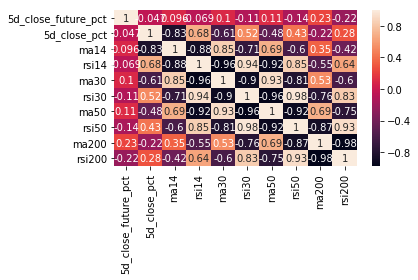

In [113]:
corr = feature_and_target.corr()
sns.heatmap(corr, annot=True)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

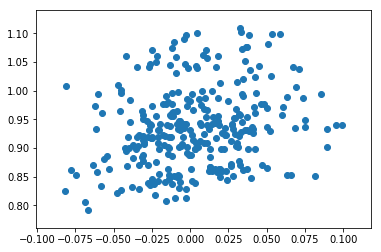

In [114]:
plt.scatter(lng['5d_close_future_pct'], lng['ma200'])
plt.show()

In [0]:
import statsmodels.api as sm

In [116]:
linear_features = sm.add_constant(features)
train_size = int(0.85 * features.shape[0])
train_features = linear_features[:train_size]
train_targets = targets[:train_size]
test_features = linear_features[train_size:]
test_targets = targets[train_size:]

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [117]:
print(linear_features.shape, train_features.shape, test_features.shape)

(295, 10) (250, 10) (45, 10)


In [118]:
model = sm.OLS(train_targets, train_features)
results = model.fit()
print(results.summary())

                             OLS Regression Results                            
Dep. Variable:     5d_close_future_pct   R-squared:                       0.273
Model:                             OLS   Adj. R-squared:                  0.246
Method:                  Least Squares   F-statistic:                     10.01
Date:                 Wed, 25 Sep 2019   Prob (F-statistic):           4.92e-13
Time:                         05:29:05   Log-Likelihood:                 536.49
No. Observations:                  250   AIC:                            -1053.
Df Residuals:                      240   BIC:                            -1018.
Df Model:                            9                                         
Covariance Type:             nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            6.8197      1.169    